**Исходные данные:**
**Вариант 2-I-а**
- L = 1.2 м
- q = 1200 Н/м
- M = 450 Н*м
- b = 0.05 м

**Материал:**
- УП на основе высокомодульных волокон:
- - E<sub>1</sub> = 220 ГПа
- - E<sub>2</sub> = 7 ГПа
- - G<sub>12</sub> = 5 ГПа
- - &nu;<sub>1</sub> = 0.23
- - &rho;<sub>1</sub> = 1580 кг/м<sup>3</sup>
- Схема армирования:
- - +30° ✖ 2 / -30° ✖ 2 / 90° ✖ 1

**Схема нагружения**

![Схема нагружения](1.png)

**Параметры сечения**

![Параметры сечения](2.png)

**Необходимо**
- Записать уравнение изогнутой оси балки без учета сдвига w(x); 
- Построить график изогнутой оси балки; 
- Определить максимальный прогиб балки; 
- Определить напряжения в слоях КМ σ<sub>1</sub><sup>i</sup>, σ<sub>2</sub><sup>i</sup> , τ<sub>12</sub><sup>i</sup>;
- Определить массу стержня; 
- Записать уравнение изогнутой оси балки с учетом сдвига w(x); 
- Определить максимальный прогиб балки с учетом сдвига и сравнить его со значением, определенным без учета сдвига.


In [98]:
# Импорт необходимых библиотек
import sympy as smp
from sympy import Eq, dsolve, Derivative, latex
import numpy as np
import math
import matplotlib.pyplot as plt
# Вывод значений параметров в Jupyter Notebook в LaTeX стиле
from IPython.display import display, Math

def print_latex(expr, name, unit):
    display(Math(f'{name} = {latex(expr)}~{unit}'))

def print_latex_str(latex_str):
    display(Math(latex_str))

# Определение символов
x = smp.symbols('x')
nu12, nu21, E1, E2, G12 = smp.symbols('nu12 nu21 E1 E2 G12')
L, q, M, E_x, I_x, G_x, F_x = smp.symbols('L q M E I G F')
w = smp.symbols('w', cls=smp.Function)
theta = smp.symbols('theta', cls=smp.Function)
q9 = 1200
M9 = 450
L9 = 1.2


1) Определение необходимых параметров материала

In [99]:
# Параметры материала
E1 = 60
E2 = 5
G12 = 5
nu21 = 0.3
ro = 1350
h0 = 0.25
n = 7
alpha = [15, 15, 15, -15, -15, -15, 90]
alpha_rad = [math.radians(a) for a in alpha]
nu12 = nu21*E2/E1
E12 = E1 * nu12 + 2 * G12
E_1 = E1/(1 - nu12 * nu21)
E_2 = E2/(1 - nu12 * nu21)
print_latex(nu12, 'nu_{12}', 'ГПа')
print_latex(E12, 'E_{12}', 'ГПа')
print_latex(E_1, 'E_1', 'ГПа')
print_latex(E_2, 'E_2', 'ГПа')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

2) Определение коэффициентов жёсткости

In [100]:
# Вычисление коэффициентов жесткости
A11 = np.zeros(n)
A12 = np.zeros(n)
A22 = np.zeros(n)
A44 = np.zeros(n)

for i in range(n):
    A11[i] = E_1 * np.cos(alpha_rad[i])**4 + E_2 * np.sin(alpha_rad[i])**4 + 2*E12*(np.cos(alpha_rad[i])**2) * np.sin(alpha_rad[i])**2
    A12[i] = E_1 * nu12 + (E_1 + E_2 - 2 * E12) * (np.cos(alpha_rad[i])**2) * np.sin(alpha_rad[i])**2
    A22[i] = E_1 * np.sin(alpha_rad[i])**4 + E_2 * np.cos(alpha_rad[i])**4 + 2*E12*(np.cos(alpha_rad[i])**2) * np.sin(alpha_rad[i])**2
    A44[i] = (E_1 + E_2 - (2 * E_1 * nu12)) * ((np.cos(alpha_rad[i])**2) * np.sin(alpha_rad[i])**2) + G12*((np.cos(alpha_rad[i])**2) - np.sin(alpha_rad[i])**2)**2

B11 = sum(A11) * (h0/ n/h0)
B12 = sum(A12) * (h0/ n/h0)
B22 = sum(A22) * (h0/ n/h0)
B44 = sum(A44) * (h0/ n/h0)

E_x1 = B11 - (B12**2)/B22
G_xy = B44

print_latex(A11, 'A_{11}', '')
print_latex(A12, 'A_{12}', '')
print_latex(A22, 'A_{22}', '')
print_latex(A44, 'A_{44}', '')

print_latex(B11, 'B_{11}', '')
print_latex(B12, 'B_{12}', '')
print_latex(B22, 'B_{22}', '')
print_latex(B44, 'B_{44}', '')

print_latex(E_x1, 'E_x', 'ГПа')
print_latex(G_xy, 'G_{xy}', 'ГПа')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

3) Уравнение изогнутой оси балки без учёта сдвига (гипотеза Бернулли)

In [101]:
# Определение дифференциального уравнения
diff_eq = Eq(Derivative(w(x), x, x, x, x), -q/E_x/I_x)
solution = dsolve(diff_eq, w(x))
solution1 = Derivative(solution, x)

# Вывод решения дифференциального уравнения
solution


Eq(w(x), C1 + C2*x + C3*x**2 + C4*x**3 - q*x**4/(24*E*I))

4) Граничные условия для заданной расчетной схемы
   - $w(0) = 0$
   - $w'(0) = 0$
   - $w'''(L) = 0$
   - $w''(L) = \frac{M}{EI}$

In [102]:
# Определение граничных условий и решение дифференциального уравнения
boundary_conditions = [
    Eq(w(0), 0),
    Eq(w(x).diff(x).subs(x, 0), 0),
    Eq(w(x).diff(x, x).subs(x, L), M/E_x/I_x),
    Eq(w(x).diff(x, x, x).subs(x, L), 0)
]

diff_eq = Eq(w(x).diff(x, x, x, x), -q/E_x/I_x)
solution = dsolve(diff_eq, w(x), ics={bc.lhs: bc.rhs for bc in boundary_conditions})

# Вывод решения дифференциального уравнения с граничными условиями
solution

Eq(w(x), L*q*x**3/(6*E*I) - q*x**4/(24*E*I) + x**2*(-L**2*q + 2*M)/(4*E*I))

5) Определение парметров сечения

In [103]:
# Параметры сечения
b = 50
delta = n * h0
I9 = np.pi*(b**3)*delta/(1000)
E9 = E_x1
F9 = np.pi*b*delta*1000
G9 = G_xy
values_to_sub = {q: q9, M: M9, L: L9, E_x: E9, I_x: I9}
solutions_subs = solution.subs(values_to_sub)

print_latex(E_x1*I9, 'E_x*I', 'м^3 * кг/с^2')
print_latex(G9*F9, 'G_{xy}*F', 'Па')
solutions_subs

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Eq(w(x), -0.0015801650877252*x**4 + 0.00758479242108094*x**3 - 0.00654188346318231*x**2)

6) Построение линии изгиба стержня по функции w(x) для метода Бернулли

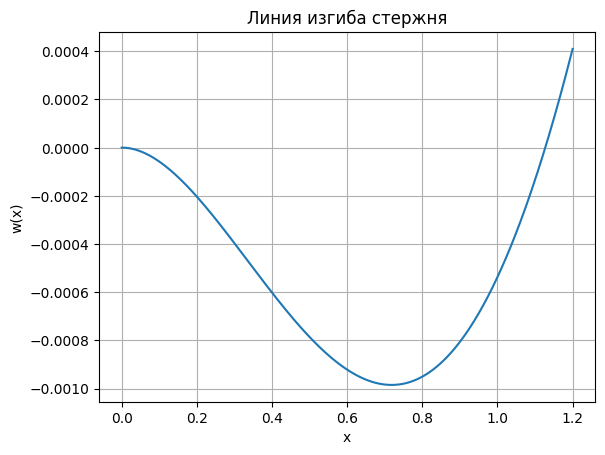

In [104]:
# Вычисление численного значения функции
numeric_value = solutions_subs.rhs.evalf()

# Построение графика функции
x_vals = np.linspace(0, 1.2, 400)
y_vals = [numeric_value.subs(x, val).evalf() for val in x_vals]

plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('w(x)')
plt.title('Линия изгиба стержня')
plt.grid(True)
plt.show()

7) Определение максимального перемещения

In [105]:
# Поиск максимального значения функции
w_func = solutions_subs.rhs 
first_derivative = smp.diff(w_func, x)
diff_eq_fd = Eq(first_derivative, 0)
solution_fd = smp.solve(Eq(first_derivative, 0), x)

# Фильтрация решений
filtered_solutions = [solution for solution in solution_fd if 0 <= solution <= 1.2]
numeric_w_func = smp.lambdify(x, w_func, "numpy")
max_solution = min(filtered_solutions, key=numeric_w_func)
max_value = numeric_w_func(max_solution)

latex_output = rf"""
Максимальное значение функции достигается в точке x = {max_solution}, где $w_{{\rm func}} = {max_value}$
"""

# Выводим Latex-выражение
print_latex_str(latex_output)

<IPython.core.display.Math object>

8) Определение деформаций и напряженияй в слоях

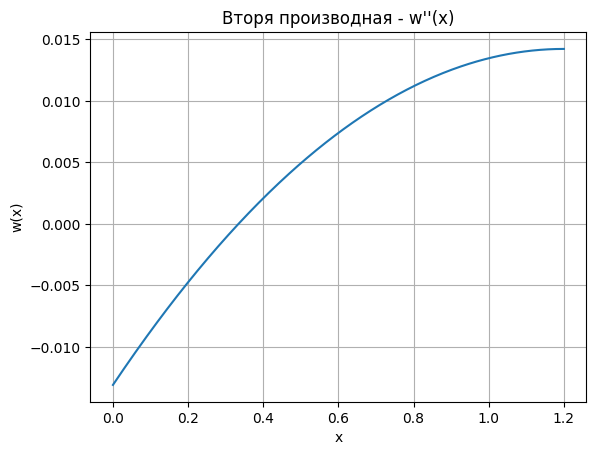

Максимальное значение второй пароизводной: 0.0142214857895268


<IPython.core.display.Math object>

-0.0189619810527024*x**2 + 0.0455087545264857*x - 0.0130837669263646

In [106]:
#Напряжения в слоях
z_max = b/2000
w_func2 = solutions_subs.rhs


second_derivative = smp.diff(w_func2, x, 2)

numeric_functionsf = smp.lambdify(x, second_derivative, "numpy")

x_vals = np.linspace(0, 1.2, 400)


y_vals_sd = numeric_functionsf(x_vals)
plt.plot(x_vals, y_vals_sd)
plt.xlabel('x')
plt.ylabel('w(x)')
plt.title("Вторя производная - w''(x)")
plt.grid(True)
plt.show()

critical_points = smp.solve(second_derivative, x)


derivative_values = [second_derivative.subs(x, point) for point in critical_points]
derivative_values.extend([second_derivative.subs(x, 0), second_derivative.subs(x, 1.2)])


max_derivative = max(abs(value) for value in derivative_values if value is not None)

print(f"Максимальное значение второй пароизводной: {max_derivative}")
print_latex_str("Вторая \\ производная:")
second_derivative

In [107]:
#Глобальные деформации в направлении х и у
eps_x = -z_max * max_derivative
print_latex(eps_x, 'ε_x', '')
eps_y = -B12*eps_x/B22
print_latex(eps_y, 'ε_y', '')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [108]:
#Определение деформаций и напряжений в слоях
eps1 = np.zeros(n)
eps2 = np.zeros(n)
gam12 = np.zeros(n)
sigma1 = np.zeros(n)
sigma2 = np.zeros(n)
tau12 = np.zeros(n)
for i in range(n):
    eps1[i] = eps_x * np.cos(alpha_rad[i])**2 + eps_y * np.sin(alpha_rad[i])**2
    eps2[i] = eps_x * np.sin(alpha_rad[i])**2 + eps_y * np.cos(alpha_rad[i])**2
    gam12[i]= (eps_y - eps_x) * np.sin(2*alpha_rad[i])
    sigma1[i] = E_1 * (eps1[i]+ nu12 * eps2[i])*1000
    sigma2[i] = E_2 * (eps2[i]+ nu21 * eps1[i])*1000
    tau12[i] = G12 * gam12[i]*10

print_latex(eps1, 'ε_1', '')
print_latex(eps2, 'ε_2', '')
print_latex(gam12, 'γ_{12}', '')
print_latex(sigma1, 'σ_1', 'МПа')
print_latex(sigma2, 'σ_2', 'МПа')
print_latex(tau12, 'τ_{12}', 'МПа')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

9) Определение площади сечения и массы стержня

In [109]:
#Площадь сечения
S = np.pi*(b**2 -(b-h0)**2)
print_latex(S, 'S', 'мм^2')
#масса 
L9 = 1.2
m = ro * L9 * S/1000000
print_latex(m, 'M', 'кг')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

10) Уравнение изогнутой оси балки с учётом сдвига (гипотеза Тимошенко)

In [110]:
#Метод Тимошенко (с учетом сдвига)
# Определяем граничные условия и дифференциальное уравнение
boundary_conditions_T_THETA = [
    Eq(w(0), 0),
    Eq(theta(0), 0),
    Eq(theta(x).diff(x).subs(x, L), M/E_x/I_x),
    Eq(theta(x).diff(x, x).subs(x, L), 0)
]


diff_eq_th = Eq(theta(x).diff(x, x, x), -q/E_x/I_x)
diff_eq_w2 = Eq(w(x).diff(x), theta(x) - (theta(x).diff(x, x) * E_x * I_x) / G_x / F_x)


solution_th = dsolve([diff_eq_th, diff_eq_w2], [theta(x), w(x)], ics={bc.lhs: bc.rhs for bc in boundary_conditions_T_THETA})
solution_th = solution_th[1]

solution_th

Eq(w(x), x**2*(q/(2*F*G) - L**2*q/(4*E*I) + M/(2*E*I)) - L*q*x/(F*G) + L*q*x**3/(6*E*I) - q*x**4/(24*E*I))

In [111]:
values_to_sub_t = {q: q9, M: M9, L: L9, E_x: E9, I_x: I9, G_x: G9, F_x: F9}
solutions_subs_t = solution_th.subs(values_to_sub_t)
solutions_subs_t

Eq(w(x), -0.0015801650877252*x**4 + 0.00758479242108094*x**3 - 0.00624186055277705*x**2 - 0.000720054984972621*x)

11) Определение максимального перемещения 

In [112]:
w_funct = solutions_subs_t.rhs 
first_derivativet = smp.diff(w_func, x)
diff_eq_fdt = Eq(first_derivative, 0)
solution_fd = smp.solve(Eq(first_derivative, 0), x)


filtered_solutions = [solution for solution in solution_fd if 0 <= solution <= 1.2]


numeric_w_func = smp.lambdify(x, w_funct, "numpy")


max_solution = min(filtered_solutions, key=numeric_w_func)
max_valuet = numeric_w_func(max_solution)

print(f"Максимальное значение функции достигается в точке x = {max_solution}, где w_func = {max_valuet}")
# Вычисление численного значения функции
numeric_valuet = solutions_subs_t.rhs.evalf()

y_vals_t = [numeric_valuet .subs(x, val).evalf() for val in x_vals]



Максимальное значение функции достигается в точке x = 0.718334617360803, где w_func = -0.00134739592454125


12) Сравнение полученных значений

In [113]:
#Сравнение полученных результатов
delt = (max_valuet - max_value)/max_valuet
print_latex(delt, 'δ', '')

<IPython.core.display.Math object>

То есть погрешность составила 5.41%

13) Построениие линии изогнутой оси для обоих методов

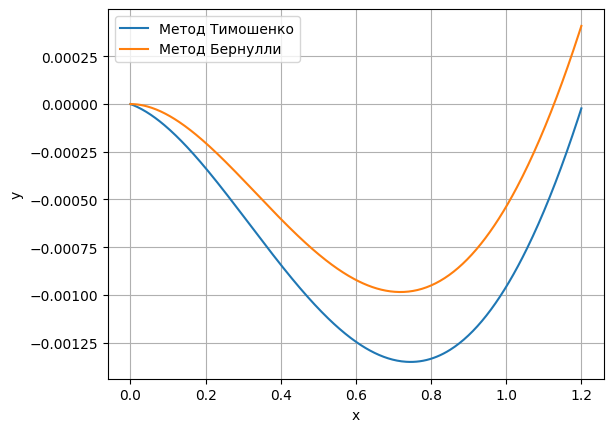

In [114]:

x = np.linspace(0, 1.2, 400)

plt.plot(x, y_vals_t, label='Метод Тимошенко')
plt.plot(x, y_vals, label='Метод Бернулли')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()